# Computing with Language: Simple Statistics 

In [1]:
import nltk
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
#recap of the previous topic
saying = ['After','all','is','said','and','done','more','is','said','than','done']
print(saying)
tokens = set(saying)
tokens = sorted(tokens)
print(tokens)
print(tokens[-2:])

['After', 'all', 'is', 'said', 'and', 'done', 'more', 'is', 'said', 'than', 'done']
['After', 'all', 'and', 'done', 'is', 'more', 'said', 'than']
['said', 'than']


## Frequency Distributions

In [3]:
#How can we automatically identify the words of a text that are most informative about the topic and genre of the text?
#How to finding the 50 most frequent words in a book??
fdist1 = FreqDist(text1)
print(fdist1)
print('\n')
#print first 50 words in the document
print("printing first 50 words from text1 ::")
vocabulary1 = list(fdist1.keys())
print(vocabulary1[:50])
#print the frequency of 'whale'
print('\n')
print('Frequency of "Whale" in the text1 ::')
print(fdist1['whale'])

<FreqDist with 19317 samples and 260819 outcomes>


printing first 50 words from text1 ::
['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', '1851', ']', 'ETYMOLOGY', '.', '(', 'Supplied', 'a', 'Late', 'Consumptive', 'Usher', 'to', 'Grammar', 'School', ')', 'The', 'pale', '--', 'threadbare', 'in', 'coat', ',', 'heart', 'body', 'and', 'brain', ';', 'I', 'see', 'him', 'now', 'He', 'was', 'ever', 'dusting', 'his', 'old', 'lexicons', 'grammars', 'with', 'queer', 'handkerchief', 'mockingly', 'embellished', 'all']


Frequency of "Whale" in the text1 ::
906


In [4]:
#let's plot a commulative frequency plot
fdist1.plot(50,cumulative=True)


<Figure size 640x480 with 1 Axes>

In [5]:
#if the frequent words don't helps, how about the words that occur once only ,the so called Hapaxes?
print("total no of words occured only once in text document :: ")
print(len(fdist1.hapaxes()))
print("\n")
print(fdist1.hapaxes()[:50])

total no of words occured only once in text document :: 
9002


['Herman', 'Melville', ']', 'ETYMOLOGY', 'Late', 'Consumptive', 'School', 'threadbare', 'lexicons', 'mockingly', 'flags', 'mortality', 'signification', 'HACKLUYT', 'Sw', 'HVAL', 'roundness', 'Dut', 'Ger', 'WALLEN', 'WALW', 'IAN', 'RICHARDSON', 'KETOS', 'GREEK', 'CETUS', 'LATIN', 'WHOEL', 'ANGLO', 'SAXON', 'WAL', 'HWAL', 'SWEDISH', 'ICELANDIC', 'BALEINE', 'BALLENA', 'FEGEE', 'ERROMANGOAN', 'Librarian', 'painstaking', 'burrower', 'grub', 'Vaticans', 'stalls', 'higgledy', 'piggledy', 'gospel', 'promiscuously', 'commentator', 'belongest']


## Fine-Grained selection of words

In [6]:
#find out long words in the corpus
#a.{w|w E V & p(w)}
#b.[w for w in v if p(w)]
v = set(text1)
long_words = [w for w in v if len(w)>15]
print(sorted(long_words))

['CIRCUMNAVIGATION', 'Physiognomically', 'apprehensiveness', 'cannibalistically', 'characteristically', 'circumnavigating', 'circumnavigation', 'circumnavigations', 'comprehensiveness', 'hermaphroditical', 'indiscriminately', 'indispensableness', 'irresistibleness', 'physiognomically', 'preternaturalness', 'responsibilities', 'simultaneousness', 'subterraneousness', 'supernaturalness', 'superstitiousness', 'uncomfortableness', 'uncompromisedness', 'undiscriminating', 'uninterpenetratingly']


In [7]:
#find the words which have length greater then 7 and have frequency greater then 7 in text5
fdist5 = FreqDist(text5)
print(sorted([w for w in set(text5) if len(w)>7 and fdist5[w]>7]))


['#14-19teens', '#talkcity_adults', '((((((((((', '........', 'Question', 'actually', 'anything', 'computer', 'cute.-ass', 'everyone', 'football', 'innocent', 'listening', 'remember', 'seriously', 'something', 'together', 'tomorrow', 'watching']


## Collocations and Bigrams
 A collocation is a sequence of words that occure together unusually often.
 Example : Red Wine

In [8]:
#to collect these kind of pair we can use bigram() function
out  = bigrams(['more','is','said','than','done'])
print(list(out))

[('more', 'is'), ('is', 'said'), ('said', 'than'), ('than', 'done')]


Colloccations are essentially just frequent bigrams.


In [17]:
#text4.collocations() is not working now
#so use the method collocation_list()
print(text4.collocation_list())

['United States', 'fellow citizens', 'four years', 'years ago', 'Federal Government', 'General Government', 'American people', 'Vice President', 'God bless', 'Chief Justice', 'Old World', 'Almighty God', 'Fellow citizens', 'Chief Magistrate', 'every citizen', 'one another', 'fellow Americans', 'Indian tribes', 'public debt', 'foreign nations']


In [18]:
print(text1.collocation_list())

['Sperm Whale', 'Moby Dick', 'White Whale', 'old man', 'Captain Ahab', 'sperm whale', 'Right Whale', 'Captain Peleg', 'New Bedford', 'Cape Horn', 'cried Ahab', 'years ago', 'lower jaw', 'never mind', 'Father Mapple', 'cried Stubb', 'chief mate', 'white whale', 'ivory leg', 'one hand']


## Counting other things

In [25]:
#print the frequently length of a word
lenList1 = [len(w) for w in text1]
fdist = FreqDist(lenList1)
#print(fdist)
#print all lengths of words used in text1
print(list(fdist.keys()))

[1, 4, 2, 6, 8, 9, 11, 5, 7, 3, 10, 12, 13, 14, 16, 15, 17, 18, 20]


In [26]:
#print the lenght and total no of words exist in corpus with that lenght
fdist.items()

dict_items([(1, 47933), (4, 42345), (2, 38513), (6, 17111), (8, 9966), (9, 6428), (11, 1873), (5, 26597), (7, 14399), (3, 50223), (10, 3528), (12, 1053), (13, 567), (14, 177), (16, 22), (15, 70), (17, 12), (18, 1), (20, 1)])

In [31]:
#print the lenght which is used maximum number of times
'{} : {}'.format(fdist.max(),fdist[fdist.max()])

'3 : 50223'

In [30]:
#percentage of that length in corpus
'{} %'.format(100*fdist.freq(fdist.max()))

'19.255882431878046 %'

## Functions 

In [32]:
#Create a frequency distribution containing the given samples
fdist = FreqDist(text1) 

In [33]:
#count of the number of times a given sample occured
fdist['monstrous']

10

In [34]:
#Frequency of a given sample
fdist.freq('monstrous')

3.834076505162584e-05

In [36]:
#Total Number of samples
fdist.N()

260819

In [42]:
#The samples sorted in order to decreasing frequency
freList = list(fdist.keys())
print(freList[:10])

['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', '1851', ']', 'ETYMOLOGY', '.']


In [46]:
#Iterate over the samples, in order  of decreasing frequency
samples = []
for sample in fdist:
    samples.append(sample)

In [47]:
#Sample with thr greatest count
fdist.max()

','

In [49]:
#tabulate the frequency distribution
fdist.tabulate()

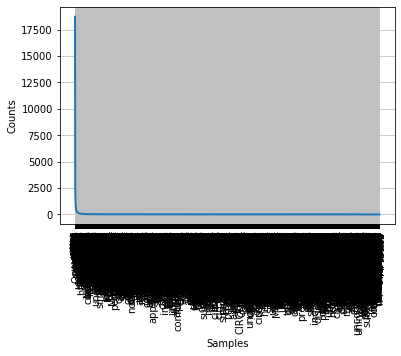

In [50]:
#Graphical plot of frequency distribution
fdist.plot()

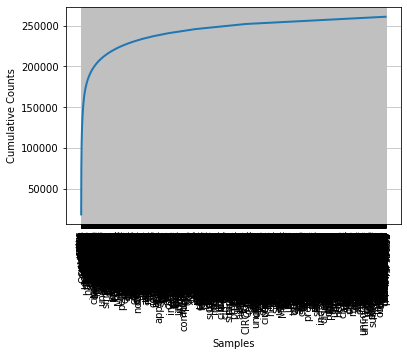

In [51]:
#Cumulative plot of the frequency distribution
fdist.plot(cumulative=True)

In [53]:
#Test if samples in fdist1 occur less frequently than in fdist2
fdist < fdist1

False